## Working with GEOREF in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/13_georef.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/13_georef.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/13_georef.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/13_georef.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [ ]:
# %pip install vgrid --upgrade

### latlon2georef

In [2]:
from vgrid.conversion.latlon2dggs import latlon2georef

lat = 10.775276
lon = 106.706797
res = 2
georef_id = latlon2georef(lat, lon, res)
georef_id

'VGBL4246'

### GEOREF to Polygon

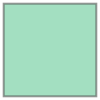

In [3]:
from vgrid.conversion.dggs2geo.georef2geo import georef2geo
from vgrid.dggs.georef import decode

georef_geo = georef2geo(georef_id)
georef_geo

### GEOREF to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.georef2geo import georef2geojson

georef_geojson = georef2geojson(georef_id)
# georef_geojson

### GEOREF Generator

In [15]:
from vgrid.generator.georefgrid import georefgrid
# georef_grid = georefgrid(resolution=1, output_format="geoparquet")
georef_grid = georefgrid(resolution=2,bbox=[104.03833902,8.53410125,111.92366325,12.80076792],output_format="parquet")
# georef_grid.plot(edgecolor="white")

Generating GEOREF DGGS: 100%|██████████| 121818/121818 [00:09<00:00, 13119.96 cells/s]


Output file saved as: d:\Github\vgrid\docs\notebooks\georef_grid_2.parquet


### GEOREF Inspect

In [1]:
from vgrid.stats.georefstats import georefinspect

resolution = 1
georef_inspect = georefinspect(resolution)
georef_inspect.head()

Generating GEOREF DGGS: 100%|██████████| 64800/64800 [00:04<00:00, 13261.17 cells/s]


georef  resolution  center_lat  center_lon   cell_width    cell_height  \
0  AAAA00           1       -89.5      -179.5     0.000000  111693.864914   
1  AAAB00           1       -88.5      -179.5  1949.301993  111693.177216   
2  AAAC00           1       -87.5      -179.5  3897.998258  111691.802680   
3  AAAD00           1       -86.5      -179.5  5845.483282  111689.743022   
4  AAAE00           1       -85.5      -179.5  7791.151992  111687.000814   

      cell_area  cell_perimeter  \
0  1.088612e+08   225337.031822   
1  3.265476e+08   229233.654684   
2  5.441267e+08   233127.086900   
3  7.615267e+08   237016.121318   
4  9.786761e+08   240899.553582   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 -90, -179 -90, -179 -89, -180 -...    False   0.013830   
1  POLYGON ((-180 -89, -179 -89, -179 -88, -180 -...    False   0.041485   
2  POLYGON ((-180 -88, -179 -88, -179 -87, -180 -...    False   0.069127   
3  POLYGON ((-180 -87, -179 -87, -179 -86, -180 -...    False   0.096746   
4  POLYGON ((-180 -86, -179 -86, -179 -85, -180 -...    False   0.124333   

        ipq       zsc  cvh  
0  0.026941  0.164138  1.0  
1  0.078091  0.279447  1.0  
2  0.125813  0.354701  1.0  
3  0.170349  0.412733  1.0  
4  0.211922  0.460350  1.0

### GEOREF Normalized Area Histogram

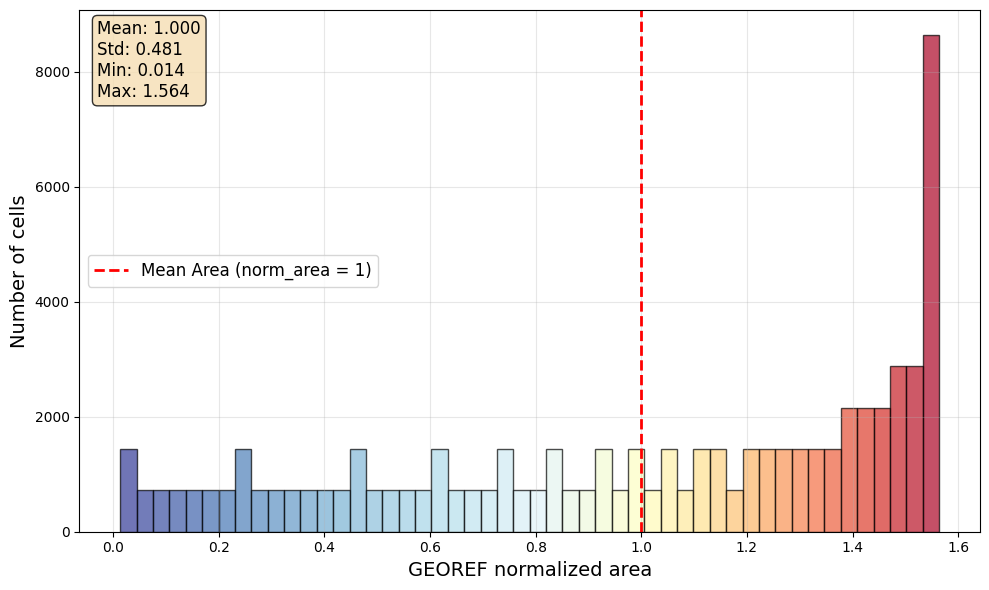

In [2]:
from vgrid.stats.georefstats import georef_norm_area_hist

georef_norm_area_hist(georef_inspect)

### Distribution of GEOREF Area Distortions

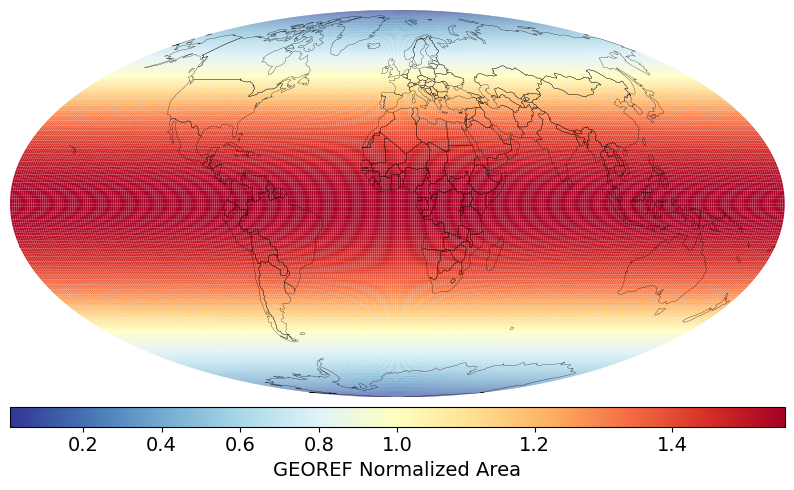

In [3]:
from vgrid.stats.georefstats import georef_norm_area

georef_norm_area(georef_inspect)

### GEOREF IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

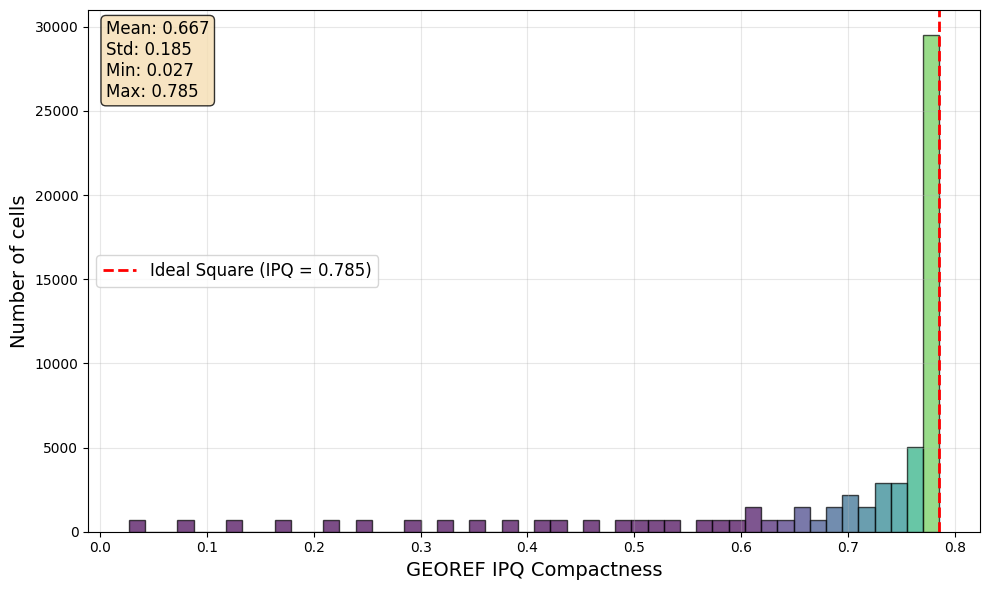

In [4]:
from vgrid.stats.georefstats import georef_compactness_ipq_hist

georef_compactness_ipq_hist(georef_inspect)

### Distribution of GEOREF IPQ Compactness

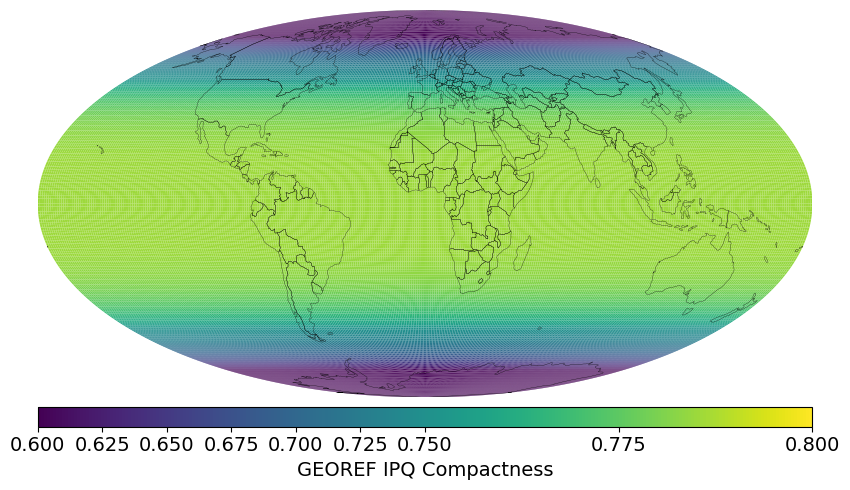

In [5]:
from vgrid.stats.georefstats import georef_compactness_ipq

georef_compactness_ipq(georef_inspect)

### GEOREF Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

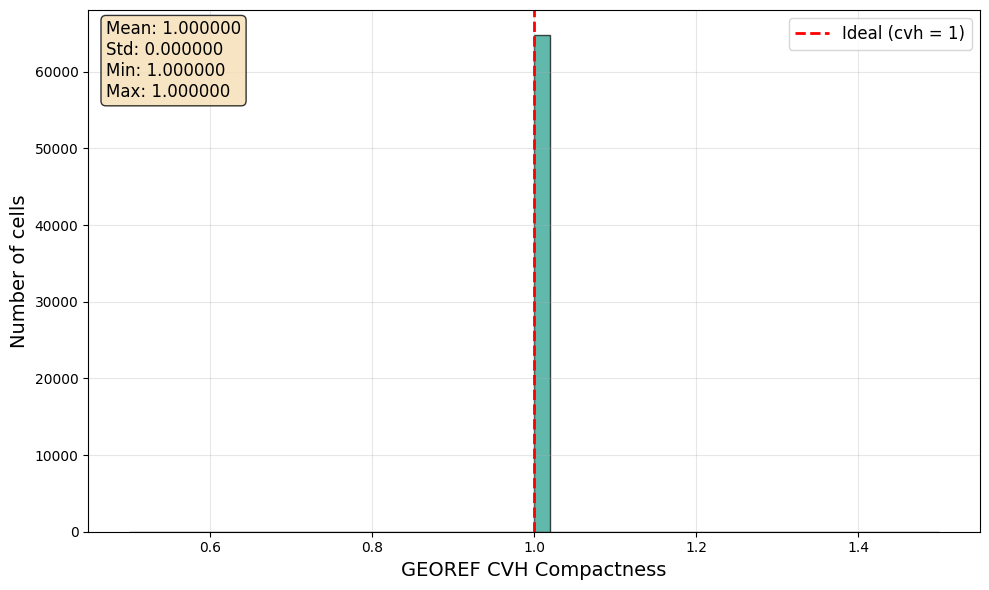

In [6]:
from vgrid.stats.georefstats import georef_compactness_cvh_hist
georef_compactness_cvh_hist(georef_inspect)

### Distribution of GEOREF Convex hull Compactness

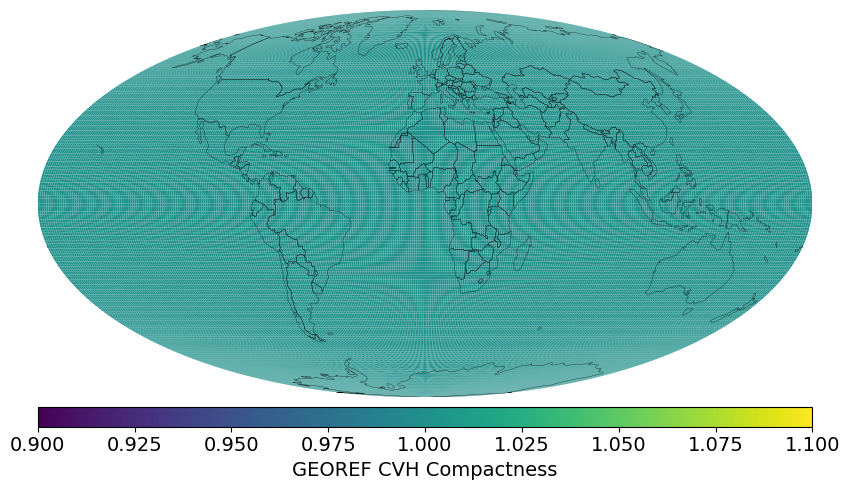

In [7]:
from vgrid.stats.georefstats import georef_compactness_cvh
georef_compactness_cvh(georef_inspect)

### GEOREF Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [2]:
from vgrid.stats import georefstats

georefstats("m")

resolution                number_of_cells  avg_edge_len_m  \
0            0                            288    1.330812e+06   
1            1                          64800    8.872082e+04   
2            2                      233280000    1.478680e+03   
3            3                    23328000000    1.478680e+02   
4            4                  2332800000000    1.478680e+01   
5            5                233280000000000    1.478680e+00   
6            6              23328000000000000    1.478680e-01   
7            7          233280000000000000000    1.478680e-03   
8            8        23328000000000000000000    1.478680e-04   
9            9    233280000000000000000000000    1.478680e-06   
10          10  23328000000000000000000000000    1.478680e-07   

    avg_cell_area_m2         cls_m  
0       1.771061e+12  1.502531e+06  
1       7.871383e+09  1.001110e+05  
2       2.186495e+06  1.668512e+03  
3       2.186495e+04  1.668512e+02  
4       2.186495e+02  1.668512e+01  
5       2.186495e+00  1.668512e+00  
6       2.186495e-02  1.668512e-01  
7       2.186495e-06  1.668512e-03  
8       2.186495e-08  1.668512e-04  
9       2.186495e-12  1.668512e-06  
10      2.186495e-14  1.668512e-07